<center><h1>Charting Yahoo's Stock Ticker Prices using Python</h1></center>

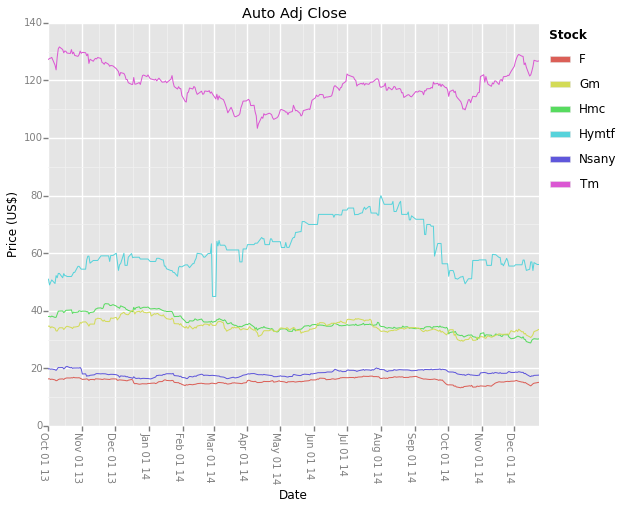

In [1]:
# the idea for def_px() came from this stackoverflow question:
# http://stackoverflow.com/questions/23541497/is-there-a-way-to-plot-a-pandas-series-in-ggplot
%matplotlib inline
from ggplot import *
import pandas.io.data as web
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

stocks = {'Tech':['GOOGL', 'MSFT', 'LNKD', 'YHOO', 'FB','HPQ','AMZN'],
          'Auto':['TM','F','GM','HMC','NSANY','HYMTF'],
          'Housing':['HD','LOW','WMT']
         }

start_date = datetime(2013,10,1)
end_date = datetime(2014, 12, 24)

@interact
def plot_tickers(stock_type = ['Auto','Tech','Housing'], month_interval = ['1','3','6','12']):
    def get_px(stock, start, end):
        return web.get_data_yahoo(stock, start, end)['Adj Close']

    df = pd.DataFrame({n: get_px(n, start_date, end_date) for n in stocks[stock_type]})
    df.reset_index(level=0, inplace=True)

    df_long = pd.melt(df, id_vars=['Date']).dropna()
    df_long = df_long.rename(columns = {'Date':'Date','variable':'Stock','value':'Price'})
    stock_plot = ggplot(df_long, aes(x='Date', y='Price', colour='Stock')) + \
        geom_line() + \
        ylab('Price (US$)') + \
        ggtitle(stock_type + ' Adj Close') + \
        scale_x_date(labels='%b %d %y',breaks=date_breaks(month_interval+' month') )
    
    # Have to use MATPLOTLIB api to rotate x tick labels.  Hopefully some day, ggplot will implement a rotation option.
    fig = stock_plot.draw()
    ax = fig.gca()
    labels = ax.get_xticklabels() 
    for label in labels: 
        label.set_rotation(270)
    plt.show()